In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score\n",
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [3]:
X.shape

(2000, 20)

In [4]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Random Forests

In [7]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9805055555555555


In [8]:
ytrain_pred

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.04, 0.96],
       ...,
       [0.97, 0.03],
       [0.98, 0.02],
       [0.23, 0.77]])

# Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


# Adaboost Classifier

In [10]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


# KNNClassifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


# No we will focus on selecting the best threshold for maximum accuracy

In [13]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9849


In [14]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.97,0.966929,0.538202,0.8
3,0.91,0.761539,0.509875,0.8
4,0.55,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.05,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [15]:
final_prediction

0      0.885262
1      0.120823
2      0.818783
3      0.745353
4      0.554947
         ...   
595    0.121340
596    0.122845
597    0.876697
598    0.163217
599    0.834857
Length: 600, dtype: float64

In [16]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90908893, 0.90827475, 0.81446108,
       0.81412833, 0.8044465 , 0.8030558 , 0.77640513, 0.77571156,
       0.76053202, 0.76037124, 0.74946856, 0.74887362, 0.72210041,
       0.72143711, 0.6642442 , 0.63743537, 0.58779968, 0.58675354,
       0.5840152 , 0.58236186, 0.57577749, 0.57550386, 0.55494674,
       0.54889283, 0.54845371, 0.54127948, 0.53365858, 0.49116892,
       0.4346034 , 0.40068654, 0.39879719, 0.37475652, 0.35586612,
       0.24217239, 0.24140421, 0.24119003, 0.23896893, 0.19125353,
       0.19098417, 0.12284501, 0.1228351 , 0.10498954])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
30,0.434603,0.961667
29,0.491169,0.958333
28,0.533659,0.958333
27,0.541279,0.958333
25,0.548893,0.958333


In [18]:
accuracy_ls

,thresholds,accuracy
30,0.434603,0.961667
29,0.491169,0.958333
28,0.533659,0.958333
27,0.541279,0.958333
25,0.548893,0.958333
26,0.548454,0.956667
24,0.554947,0.956667
31,0.400687,0.951667
32,0.398797,0.950000
23,0.575504,0.950000


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

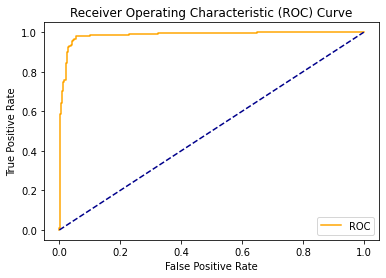

In [20]:
plot_roc_curve(fpr,tpr)

In [21]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is B243-51BD

 Directory of C:\Users\dhima

23-11-2022  15:53    <DIR>          .
24-06-2022  14:39    <DIR>          ..
07-09-2022  02:01    <DIR>          .astropy
24-07-2022  15:18    <DIR>          .conda
28-06-2022  09:45                25 .condarc
28-06-2022  09:44    <DIR>          .continuum
17-08-2022  17:21    <DIR>          .cufflinks
28-07-2022  02:32                56 .gitconfig
23-11-2022  15:42    <DIR>          .ipynb_checkpoints
25-06-2022  17:43    <DIR>          .ipython
26-06-2022  15:18    <DIR>          .jupyter
17-08-2022  17:21    <DIR>          .matplotlib
04-07-2022  18:16            61,036 All STR, List, tuple, dict, set.ipynb
25-06-2022  17:30    <DIR>          anaconda3
06-07-2022  18:01             3,717 Assignment Questions and Answer practice.ipynb
14-07-2022  16:24                22 bhanu1.txt
24-06-2022  14:14    <DIR>          Contacts
05-11-2022  17:19            26,476 Decision tree.ipynb
23-11

In [22]:
dir

<function dir>

In [23]:
ls dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is B243-51BD

 Directory of C:\Users\dhima



File Not Found


In [24]:
cd

C:\Users\dhima
